(39717, 111)
loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
Name: member_id, dtype: int64


/var/folders/y4/r_1dn4r506736mk3qc2x6p040000gn/T/ipykernel_1378/2734737006.py:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  inp = pd.read_csv("loan.csv")


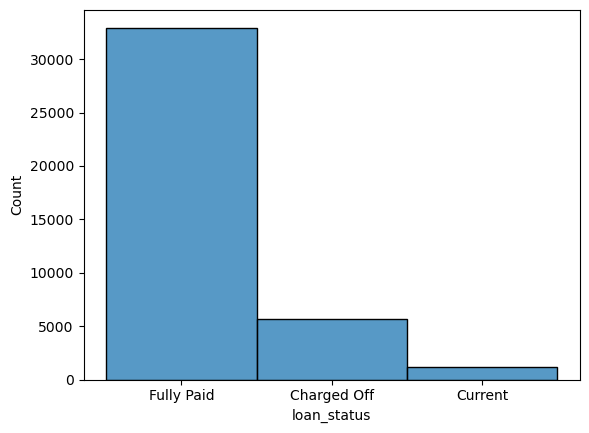

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

inp = pd.read_csv("loan.csv")

print (inp.shape)

# univariate analysis of target variable loan_status
sns.histplot(data = inp, x = "loan_status")
inp1 = inp[["loan_status", "member_id"]]
print(inp1.groupby(["loan_status"])["member_id"].count())

In [2]:
# univariate analysis of member id
inp2 = inp[["member_id", "id"]]
inp2_1 = inp2.groupby(["member_id"])["id"].count()
print (inp2_1.shape)
# all member id occur once in dataset

(39717,)


In [3]:
# bivariate analysis to find driving factors
# member id vs loan status
inp3 = inp[["member_id", "loan_status", "id"]]
inp3_1 = inp3.groupby(["member_id", "loan_status"])["id"].count()
print (inp3_1.shape)
inp3_2 = inp3[inp3["loan_status"] == "Charged Off"]["member_id"]
print (inp3_2.shape)
defaulter_str = str(inp3_2.iloc[0])
for i in range(1,len(inp3_2)):
    defaulter_str = defaulter_str + "," + str(inp3_2.iloc[i])
print (defaulter_str)
# list of defaulter member ids

(39717,)
(5627,)
1314167,1306957,1306721,1298717,1303503,1269083,1304634,1304679,1304764,1304521,1304123,1304116,1303652,1303778,1303740,1303528,1292558,1303143,1302907,1302924,1302365,1302588,1302360,1302564,1300572,1302472,1302450,1302151,1302371,1247741,1302032,1301744,1301933,1294536,1301506,1301699,1301481,1301632,1301405,1260676,1301027,1295793,1300982,1300949,1300801,1299754,1300476,1300716,1279867,1300594,1300514,1296011,1300264,1300216,1298879,1288555,1299629,1293410,1299576,1299755,1296692,1294261,1299443,1299388,1299180,1299335,1291228,1299063,1294105,1298795,1298762,1298456,1288419,1298613,1298422,1298041,1265435,1298164,1298144,1258841,1297930,1298122,1296522,1296355,1296348,1296342,1296259,1288982,1296012,1295979,1295948,1291351,1295567,1295086,1295405,1295062,1295380,1291111,1295329,1295322,1295344,1295018,1294623,1294478,1294599,1266720,1294543,1294520,1294396,1294277,1294263,1260966,1294324,1294204,1294315,1294107,1222612,1290219,1260677,1293952,1293770,1289516,1293501

In [4]:
def func(x):
    if x == "Charged Off":
        return 0.0
    else:
        return 1.0
inp["loan_status_int"] = inp.loan_status.apply(func)

loan_amnt
500      1.000000
700      1.000000
725      1.000000
750      1.000000
800      1.000000
           ...   
34475    0.800000
34525    1.000000
34675    1.000000
34800    1.000000
35000    0.779087
Name: loan_status_int, Length: 885, dtype: float64
     loan_amnt  repaid_fraction
0          500         1.000000
1          700         1.000000
2          725         1.000000
3          750         1.000000
4          800         1.000000
..         ...              ...
880      34475         0.800000
881      34525         1.000000
882      34675         1.000000
883      34800         1.000000
884      35000         0.779087

[885 rows x 2 columns]


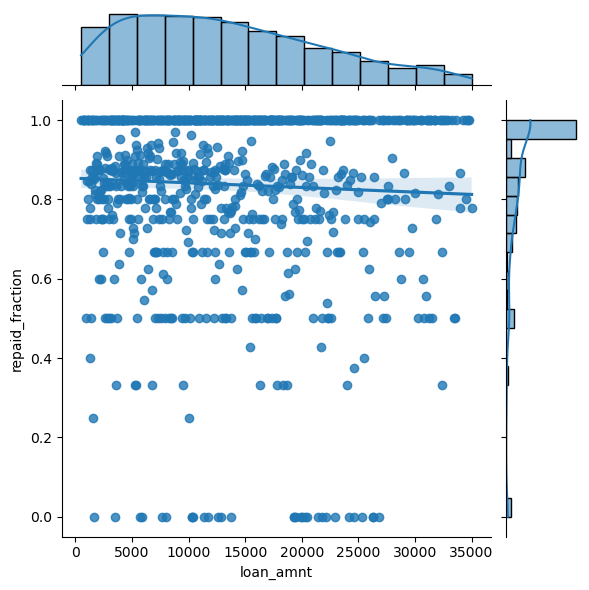

In [5]:
# loan_amnt vs loan_status
inp4 = inp[["loan_amnt","loan_status","loan_status_int"]]
inp4_1 = inp.groupby(["loan_amnt"])["loan_status_int"].mean()
print (inp4_1)
inp4_2 = pd.DataFrame({'loan_amnt':inp4_1.index, 'repaid_fraction':inp4_1.values})
print (inp4_2)
sns.jointplot(data = inp4_2, x = "loan_amnt", y = "repaid_fraction", kind = "reg")
# loan repaid fraction decreases slowly with increase in loan amount as can be seen in regression plot

term_int
36    0.889091
60    0.774033
Name: loan_status_int, dtype: float64
   term_int  repaid_fraction
0        36         0.889091
1        60         0.774033


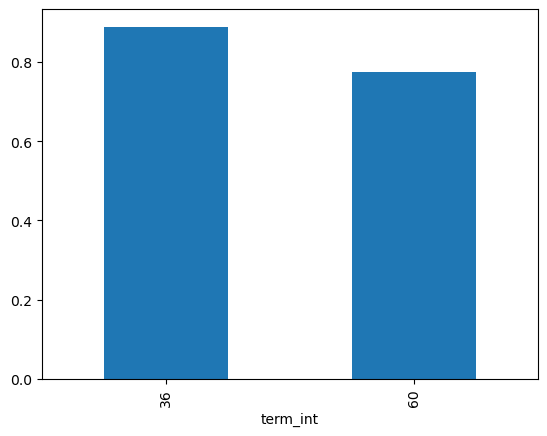

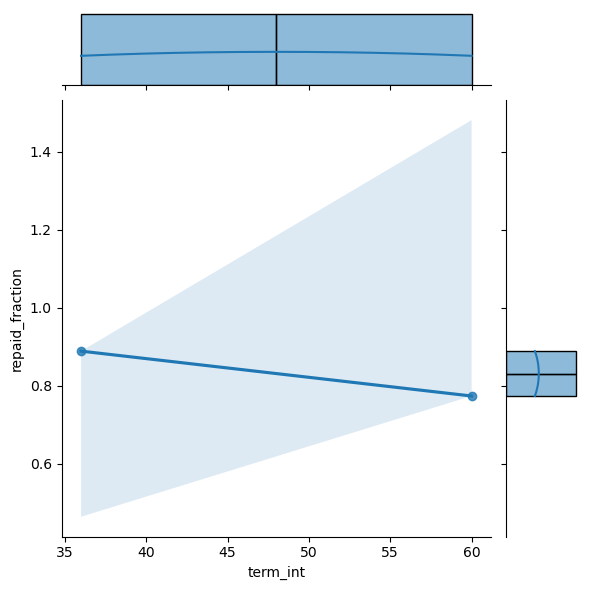

In [6]:
# term vs loan status
def func5(x):
    return int(x.strip(" ").split(" ")[0])
inp["term_int"] = inp.term.apply(func5)
inp5 = inp[["term_int","loan_status_int"]]
inp5_1 = inp5.groupby(["term_int"])["loan_status_int"].mean()
inp5_1.plot.bar()
print (inp5_1)
inp5_2 = pd.DataFrame({'term_int':inp5_1.index, 'repaid_fraction':inp5_1.values})
print (inp5_2)
sns.jointplot(data = inp5_2, x = "term_int", y = "repaid_fraction", kind = "reg")
# loan repaid fraction decreases with increase in term length

int_rate_float
5.42     0.965096
5.79     0.960976
5.99     0.945245
6.00     1.000000
6.03     0.988814
           ...   
23.59    0.750000
23.91    0.818182
24.11    0.666667
24.40    0.000000
24.59    1.000000
Name: loan_status_int, Length: 371, dtype: float64
     int_rate_float  repaid_fraction
0              5.42         0.965096
1              5.79         0.960976
2              5.99         0.945245
3              6.00         1.000000
4              6.03         0.988814
..              ...              ...
366           23.59         0.750000
367           23.91         0.818182
368           24.11         0.666667
369           24.40         0.000000
370           24.59         1.000000

[371 rows x 2 columns]


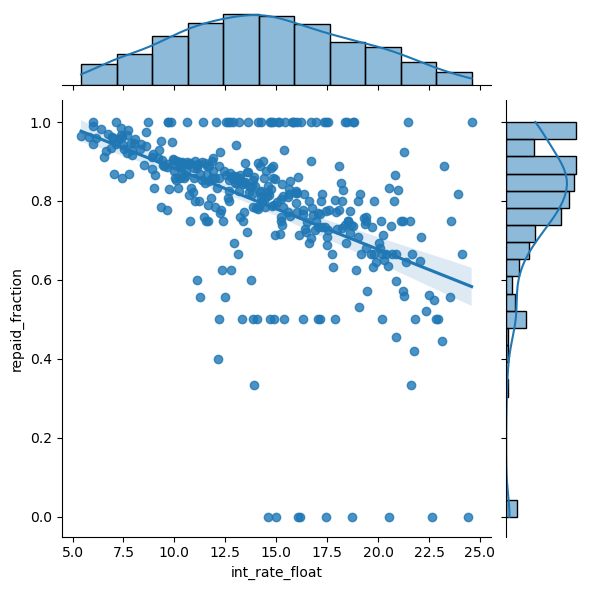

In [7]:
# interest rate vs loan status
def func6(x):
    return float(x.strip(" ").split("%")[0])
inp["int_rate_float"] = inp.int_rate.apply(func6)
inp6 = inp[["int_rate_float","loan_status_int"]]
inp6_1 = inp6.groupby(["int_rate_float"])["loan_status_int"].mean()
print (inp6_1)
inp6_2 = pd.DataFrame({'int_rate_float':inp6_1.index, 'repaid_fraction':inp6_1.values})
print (inp6_2)
sns.jointplot(data = inp6_2, x = "int_rate_float", y = "repaid_fraction", kind = "reg")
# loan repaid fraction decreases sharply with increase in interest rate

installment_float
15      1.0
16      1.0
19      1.0
20      1.0
21      1.0
       ... 
1283    1.0
1288    0.5
1295    1.0
1302    0.0
1305    0.0
Name: loan_status_int, Length: 1049, dtype: float64
      installment_float  repaid_fraction
0                    15              1.0
1                    16              1.0
2                    19              1.0
3                    20              1.0
4                    21              1.0
...                 ...              ...
1044               1283              1.0
1045               1288              0.5
1046               1295              1.0
1047               1302              0.0
1048               1305              0.0

[1049 rows x 2 columns]


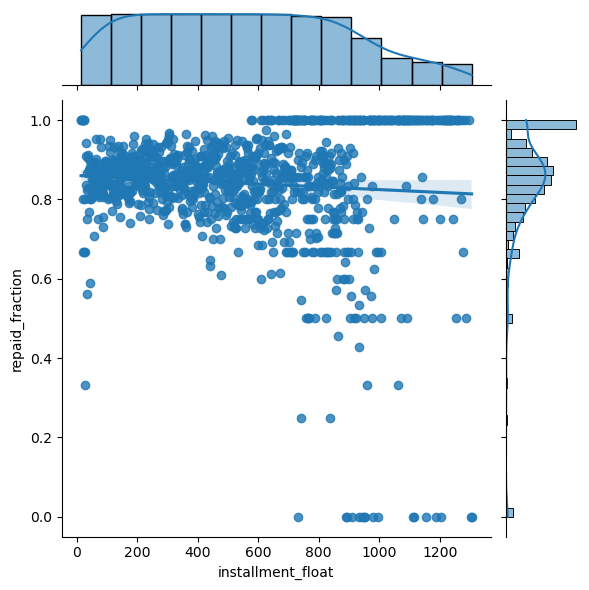

In [8]:
# installment vs loan status
def func7(x):
    return int(x)
inp["installment_float"] = inp.installment.apply(func7)
inp7 = inp[["installment_float", "loan_status_int"]]
inp7_1 = inp7.groupby(["installment_float"])["loan_status_int"].mean()
print (inp7_1)
inp7_2 = pd.DataFrame({'installment_float':inp7_1.index, 'repaid_fraction':inp7_1.values})
print (inp7_2)
sns.jointplot(data = inp7_2, x = "installment_float", y = "repaid_fraction", kind = "reg")
# loan repaid fraction decreases slowly with increase in installment size

grade
A    0.940307
B    0.881448
C    0.833663
D    0.789335
E    0.748417
F    0.695901
G    0.680380
Name: loan_status_int, dtype: float64


<Axes: xlabel='grade'>

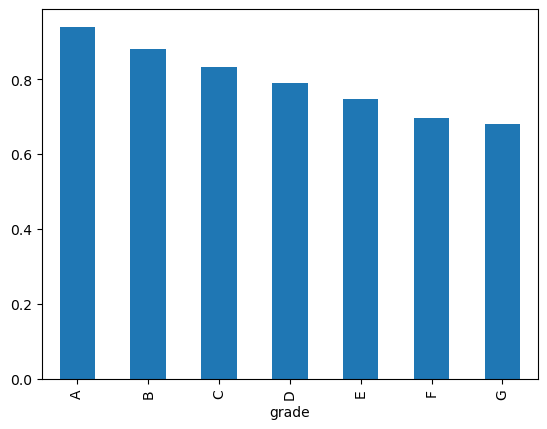

In [9]:
# grade vs loan status
inp8 = inp[["grade", "loan_status_int"]]
inp8_1 = inp8.groupby(["grade"])["loan_status_int"].mean()
print (inp8_1)
inp8_1.plot.bar()
# loan repaid fraction decreases as grade character increases

sub_grade
A1    0.973661
A2    0.950928
A3    0.943094
A4    0.938323
A5    0.920861
B1    0.906557
B2    0.889159
B3    0.883099
B4    0.869029
B5    0.868343
C1    0.842697
C2    0.840378
C3    0.823414
C4    0.828479
C5    0.824621
D1    0.820623
D2    0.798961
D3    0.781756
D4    0.780836
D5    0.760870
E1    0.740498
E2    0.751524
E3    0.784810
E4    0.722467
E5    0.737981
F1    0.723404
F2    0.718876
F3    0.724324
F4    0.684524
F5    0.542373
G1    0.701923
G2    0.641026
G3    0.604167
G4    0.767857
G5    0.666667
Name: loan_status_int, dtype: float64


<Axes: xlabel='sub_grade'>

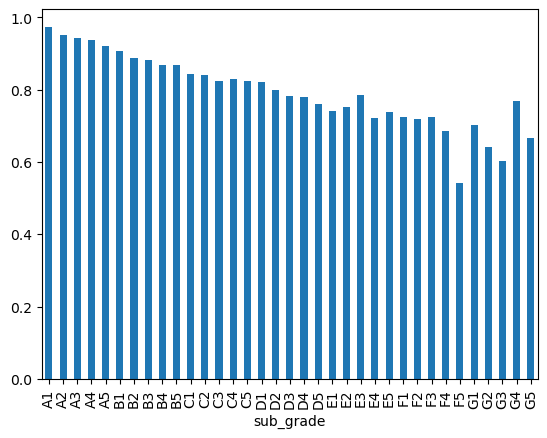

In [10]:
# subgrade vs loan status
inp9 = inp[["sub_grade", "loan_status_int"]]
inp9_1 = inp9.groupby(["sub_grade"])["loan_status_int"].mean()
print (inp9_1)
inp9_1.plot.bar()
# loan repaid fraction decreases as the sub grade alphanumeric increases